      Ayesha Tabassum
**Exploratory Data Analysis (EDA) on Customer Churn**

**All important library that used in this Project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib_inline

**Read the file**

In [2]:
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

**To Show few rows**

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Total Rows and Colums**

In [4]:
telco_data.shape

(7043, 21)

**Columns Names**

In [5]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**To check DataType**

In [6]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Numerical Values**

In [7]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Count Target Variable by Category**

Text(0.5, 1.02, 'Count Target Variable by Category ')

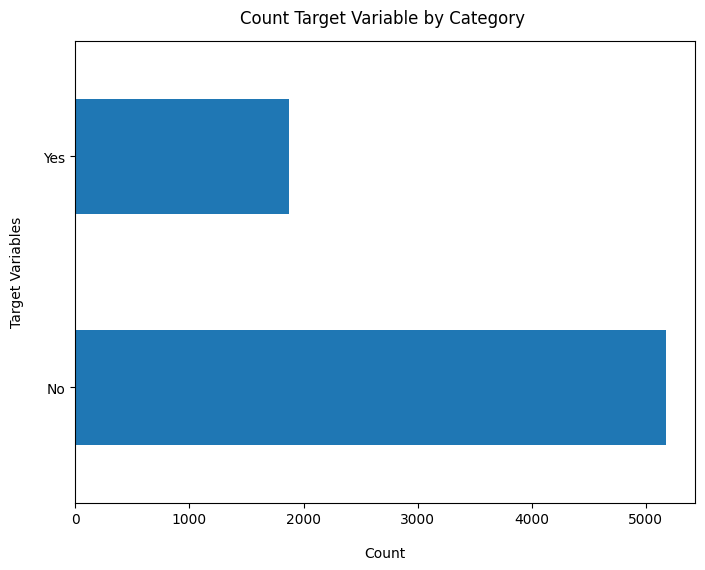

In [8]:
telco_data['Churn'].value_counts().plot(kind='barh' ,figsize=(8,6))
plt.xlabel('Count' , labelpad=14)
plt.ylabel('Target Variables' , labelpad=14)
plt.title('Count Target Variable by Category ', y=1.02)




**For Descision Making Process**

In [9]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])


,count
Churn,
No,73.463013
Yes,26.536987


**Occurence of each unique value**

In [10]:
telco_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Check additional information like non null values and data types of column to understand its structure and identifing missing values to perform pre_processing**

In [11]:
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**To check missing values**

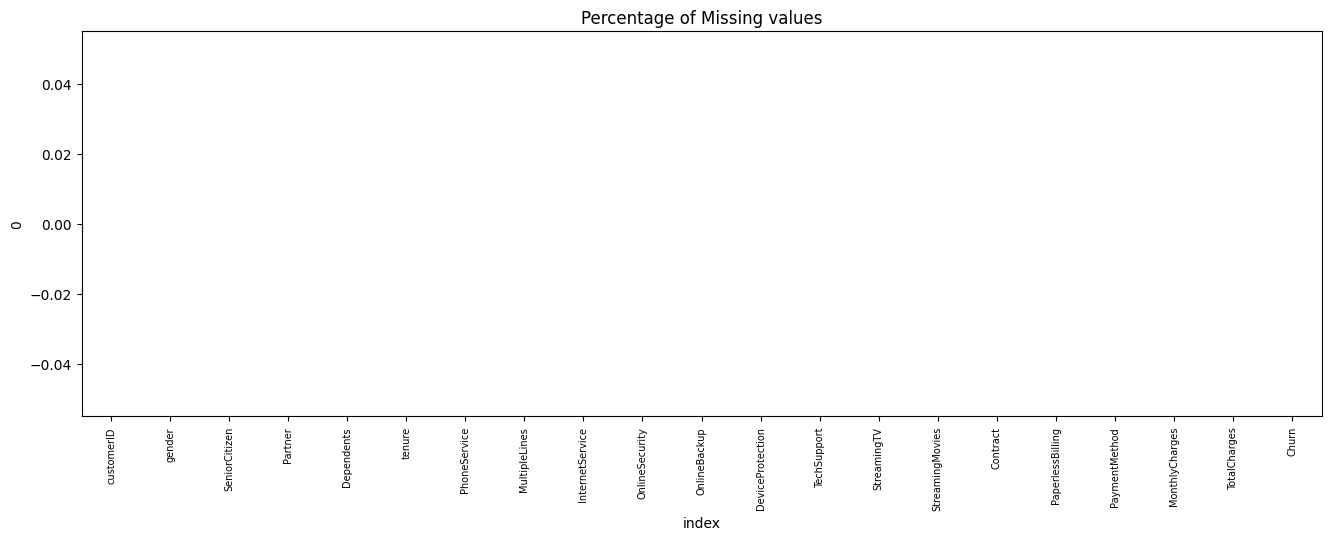

In [12]:
#Datafeames to check missing values %
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
#plot
plt.figure(figsize=(16,5))
#bar plot to visalize %
ax = sns.barplot(x='index',y=0 ,data=missing)
#plot customize
plt.xticks(rotation=90 , fontsize=7)
plt.title("Percentage of Missing values")
plt.show()

**To get the copy of data without affecting orignal data to perform further calculation**

In [13]:
telco_d = telco_data.copy()

**To convert values in numeris and handling an error during conversion by using NAN**

In [14]:
telco_d.TotalCharges = pd.to_numeric(telco_d.TotalCharges, errors='coerce')
telco_d.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***Boolean Condition is used in total charges column  ***

In [15]:
telco_d.loc[telco_d['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Remove missing values**

In [16]:
telco_d.dropna(how = 'any',inplace = True)

**Max Tenure after removing missing values**

In [17]:
print(telco_d['tenure'].max())

72


**Tenure in bins of 12 months**

In [18]:
#labels for grouping tenure
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# Assuming telco_d is your DataFrame and it contains a 'tenure' column
telco_d['tenure_group'] = pd.cut(telco_d['tenure'], range(1, 80, 12), right=False, labels=labels)

**To display data**

In [19]:
telco_d['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


**After removing specific column we get some rows**

In [20]:
telco_data.drop(columns=['customerID' , 'tenure'],axis=1 ,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Univariate Analysis**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


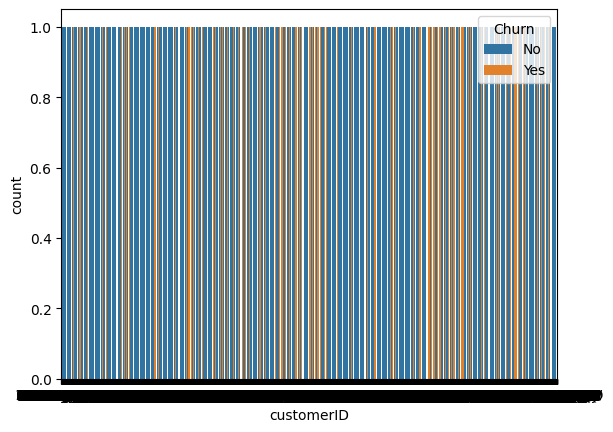

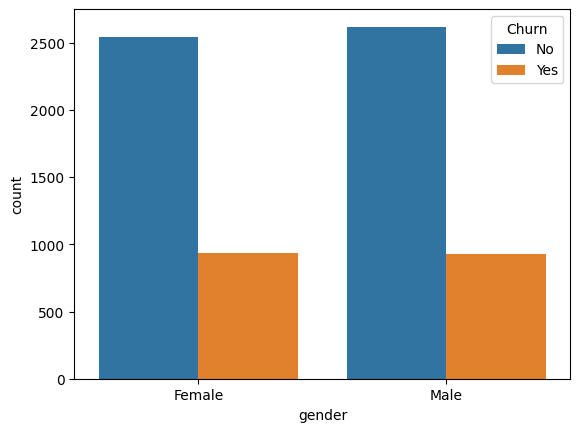

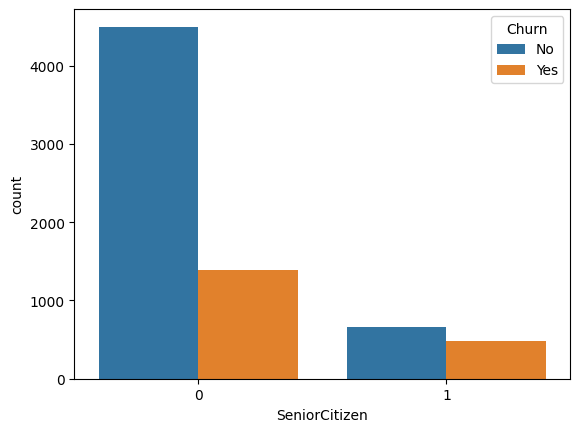

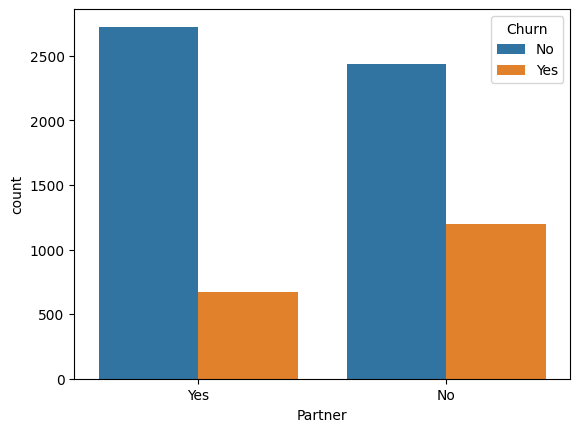

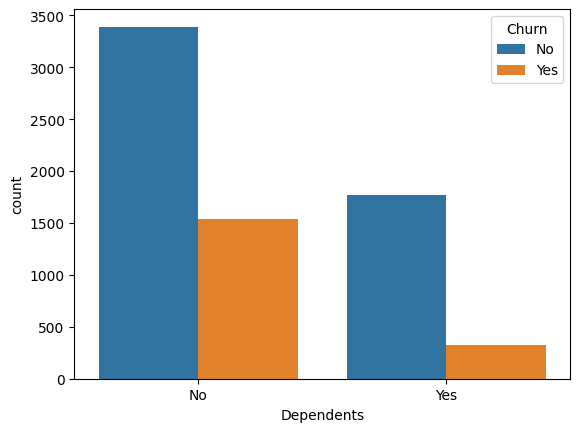

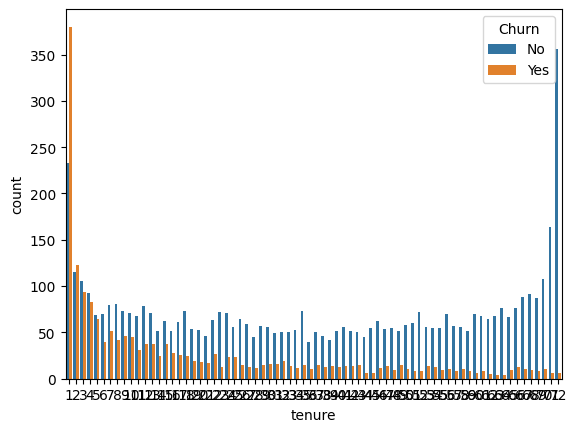

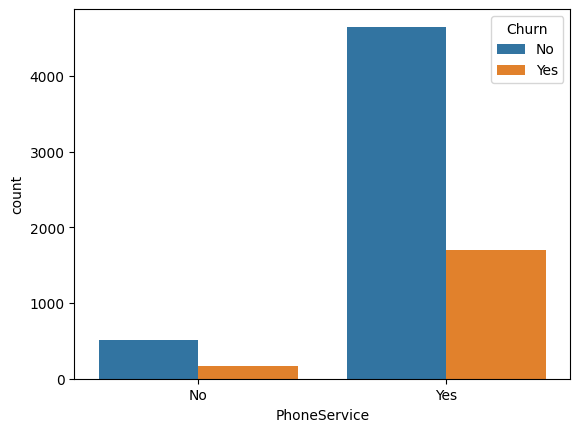

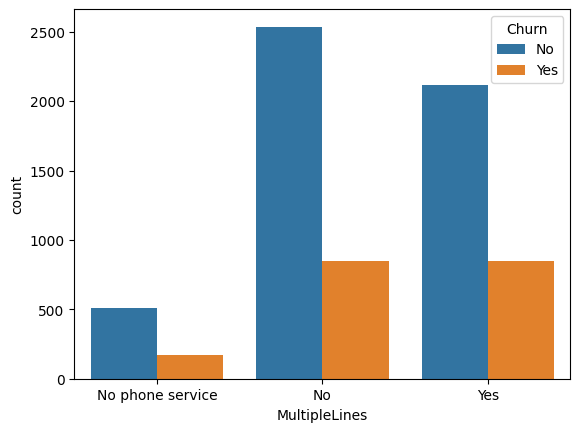

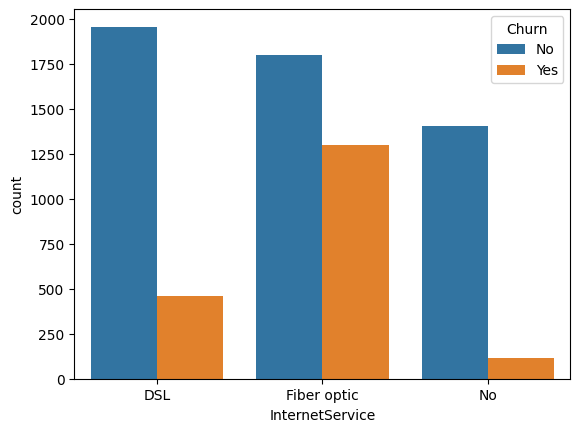

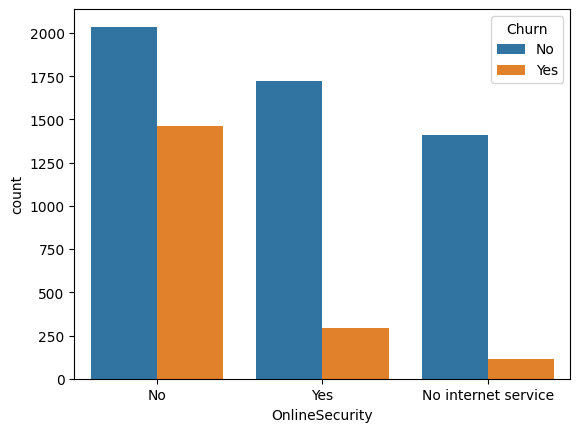

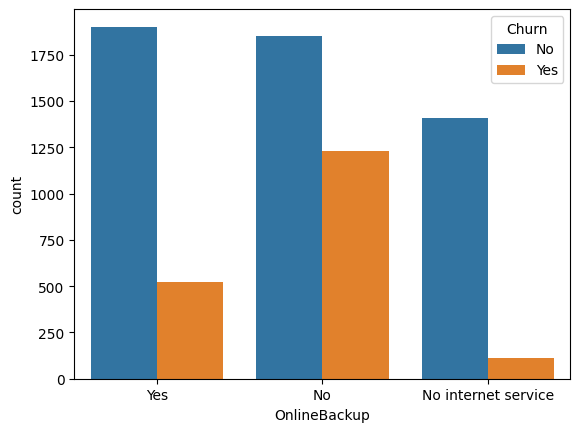

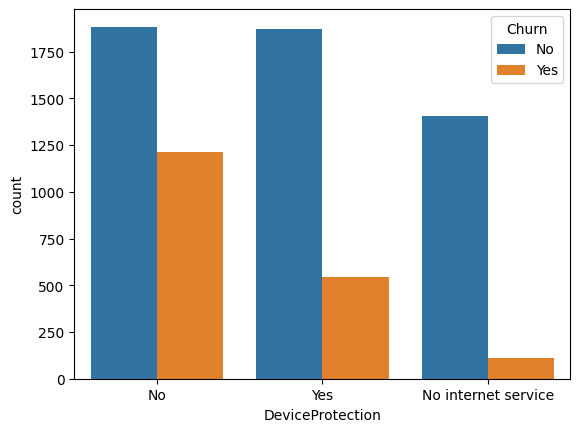

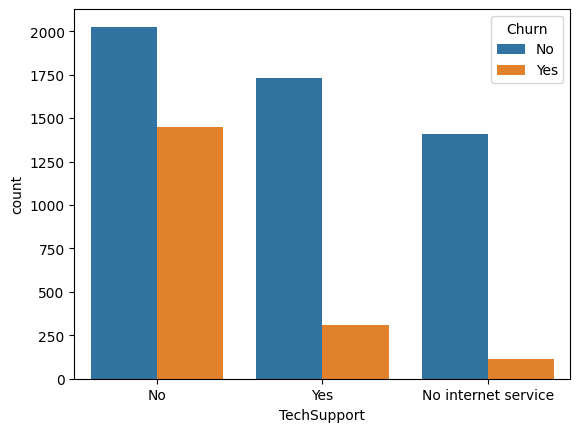

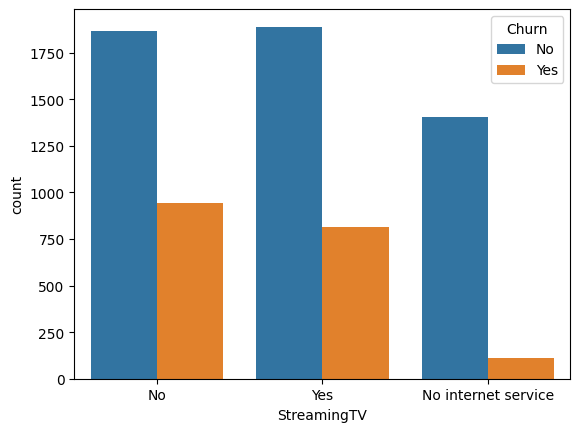

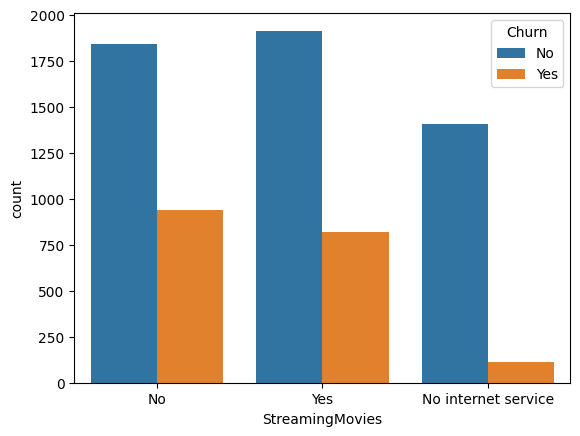

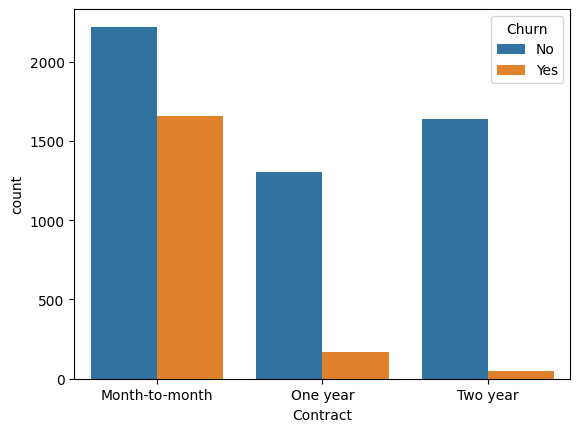

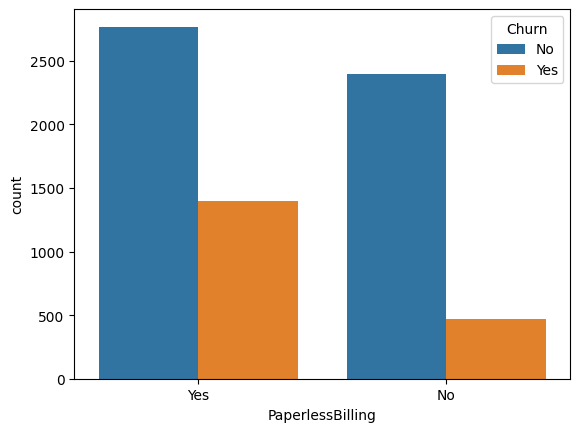

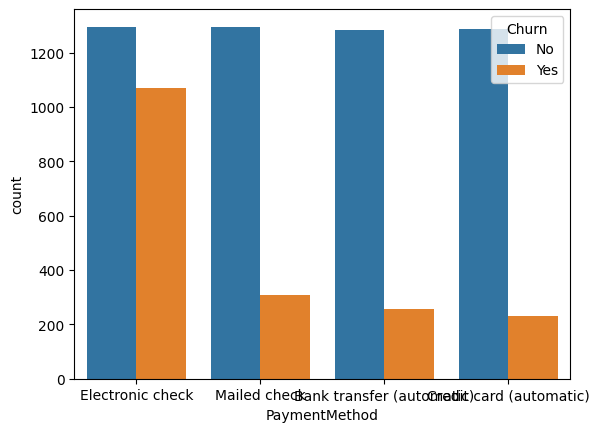

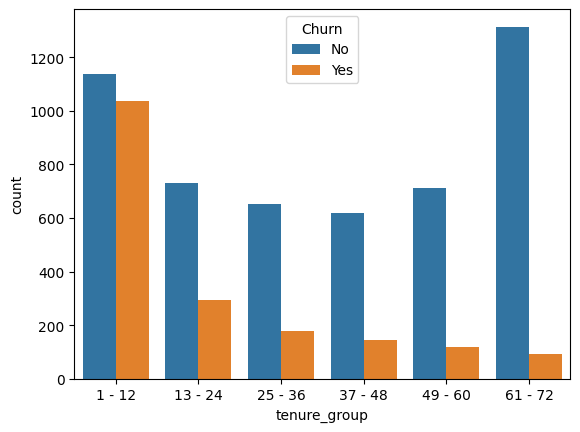

In [21]:
for i, predictor in enumerate(telco_d.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
 plt.figure(i)
 sns.countplot(data=telco_d, x=predictor, hue='Churn')

In [22]:
telco_d['Churn'] = np.where(telco_d.Churn =='Yes',1,0)

In [23]:
telco_d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [24]:
telco_data_dummies = pd.get_dummies(telco_d)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


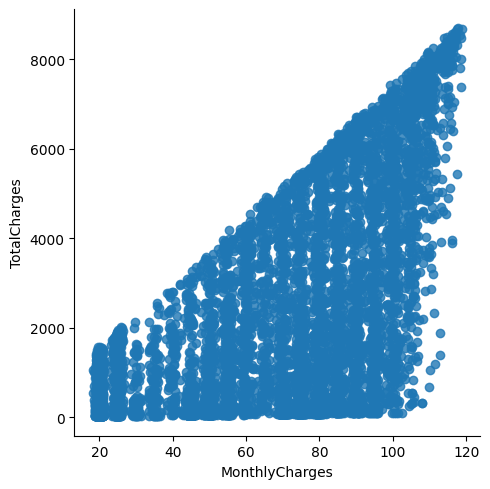

In [25]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

**Monthly Charges by Churn**

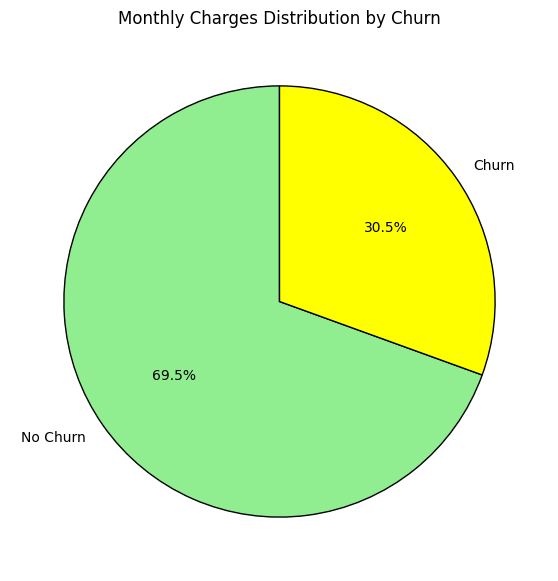

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming telco_data_dummies is your DataFrame

# Step 1: Summarize MonthlyCharges for Churn == 0 and Churn == 1
no_churn_total = telco_data_dummies[telco_data_dummies["Churn"] == 0]['MonthlyCharges'].sum()
churn_total = telco_data_dummies[telco_data_dummies["Churn"] == 1]['MonthlyCharges'].sum()

# Step 2: Create labels and values for the pie chart
labels = ['No Churn', 'Churn']
values = [no_churn_total, churn_total]
colors = ['lightgreen', 'yellow']

# Step 3: Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Step 4: Add a title
plt.title('Monthly Charges Distribution by Churn')

# Show the plot
plt.show()


**Total Charges by Churn**

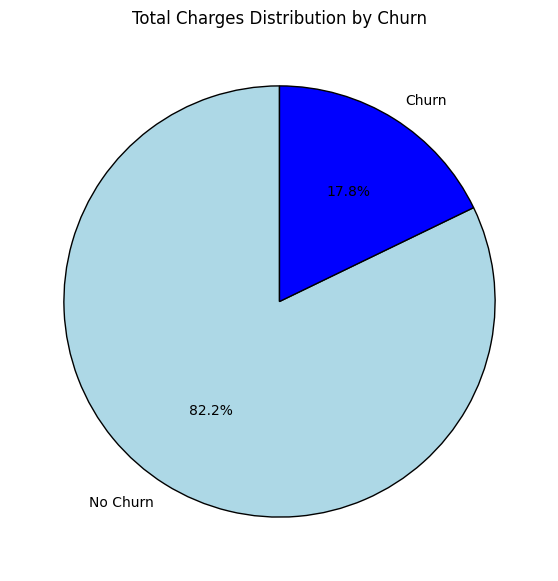

In [27]:
import matplotlib.pyplot as plt

# Assuming telco_data_dummies is your DataFrame

# Step 1: Summarize TotalCharges for Churn == 0 and Churn == 1
no_churn_total = telco_data_dummies[telco_data_dummies["Churn"] == 0]['TotalCharges'].sum()
churn_total = telco_data_dummies[telco_data_dummies["Churn"] == 1]['TotalCharges'].sum()

# Step 2: Create labels and values for the pie chart
labels = ['No Churn', 'Churn']
values = [no_churn_total, churn_total]
colors = ['lightblue', 'blue']

# Step 3: Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Step 4: Add a title
plt.title('Total Charges Distribution by Churn')

# Show the plot
plt.show()


**Bar Chart show correlation between Churn and Values**

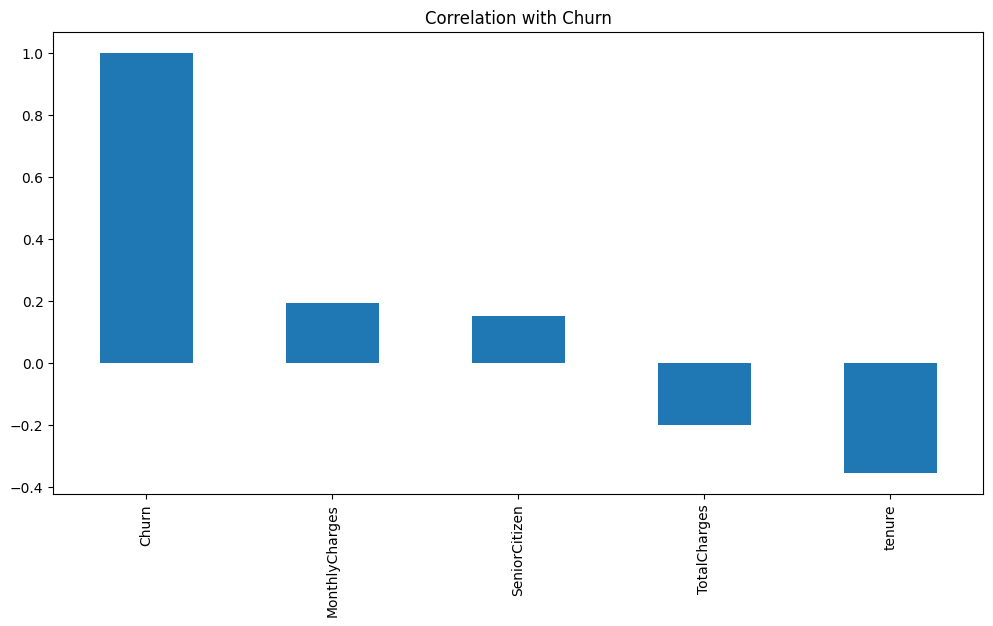

In [31]:
# Compute correlation with 'Churn' only for numeric columns
numeric_cols = telco_data_dummies.select_dtypes(include=['float64', 'int64'])
corr_with_churn = numeric_cols.corrwith(telco_data_dummies['Churn'])

# Plot the results
plt.figure(figsize=(12, 6))
corr_with_churn.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Churn')
plt.show()


***HeatMap that show the coreleation dark color show stronger ***





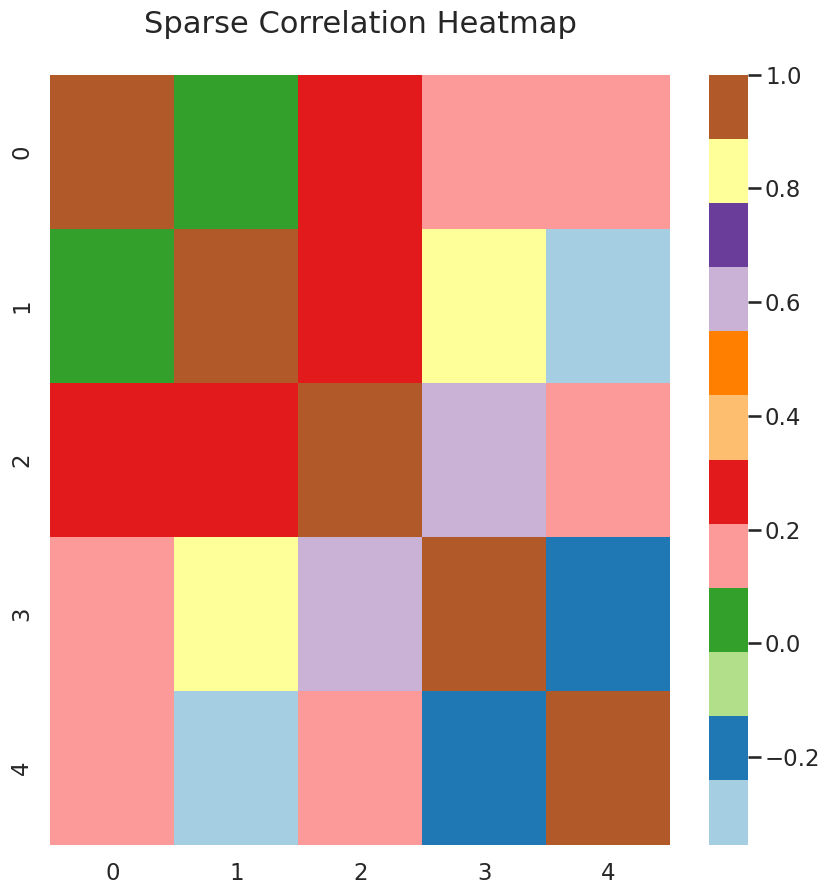

In [42]:
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrame to a sparse matrix to save memory
sparse_matrix = sparse.csr_matrix(telco_data_dummies.select_dtypes(include=['float64', 'int64']))

# Compute correlation on sparse matrix
correlation_matrix = pd.DataFrame.sparse.from_spmatrix(sparse_matrix).corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="Paired", annot=False)  # No annotations for speed
plt.title('Sparse Correlation Heatmap')
plt.show()



**Splitting the Dataset Based on Churn Status**

In [33]:
new_df1_target0=telco_d.loc[telco_d["Churn"]==0]
new_df1_target1=telco_d.loc[telco_d["Churn"]==1]

In [34]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

**Distribution of Gender for Churned Customers**

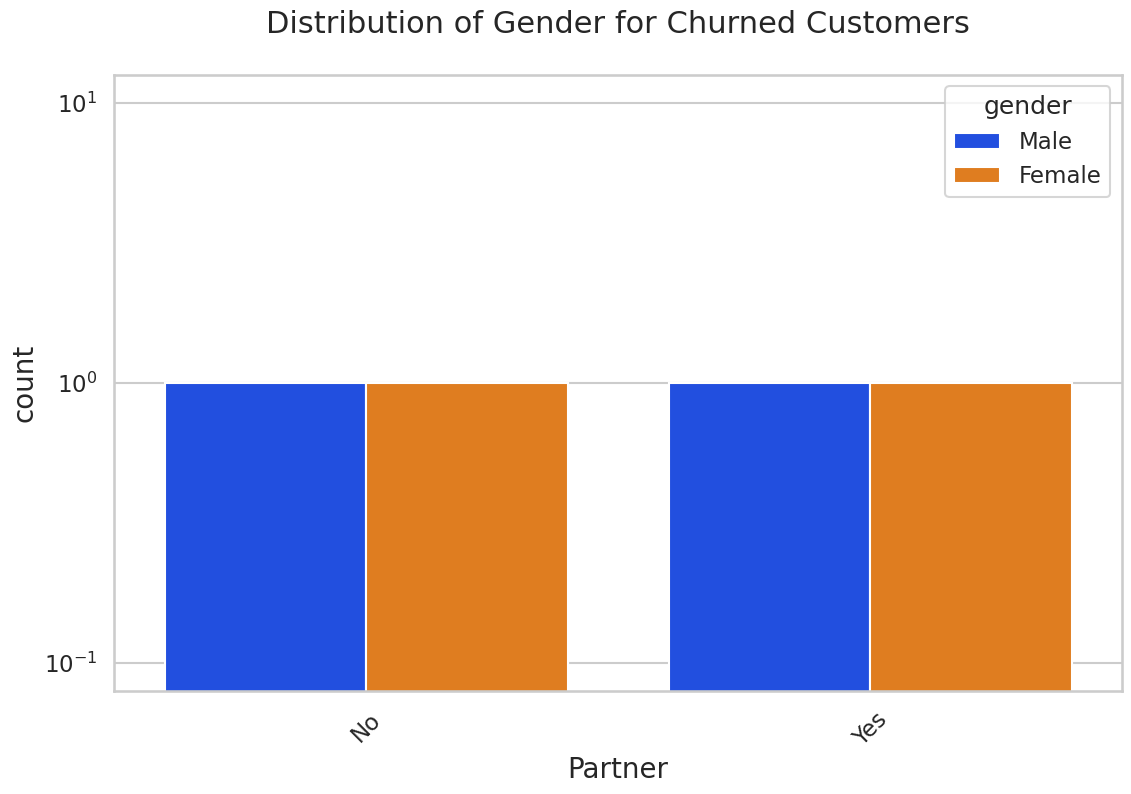

In [35]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')


**Distribution of Gender for Non Churned Customers**

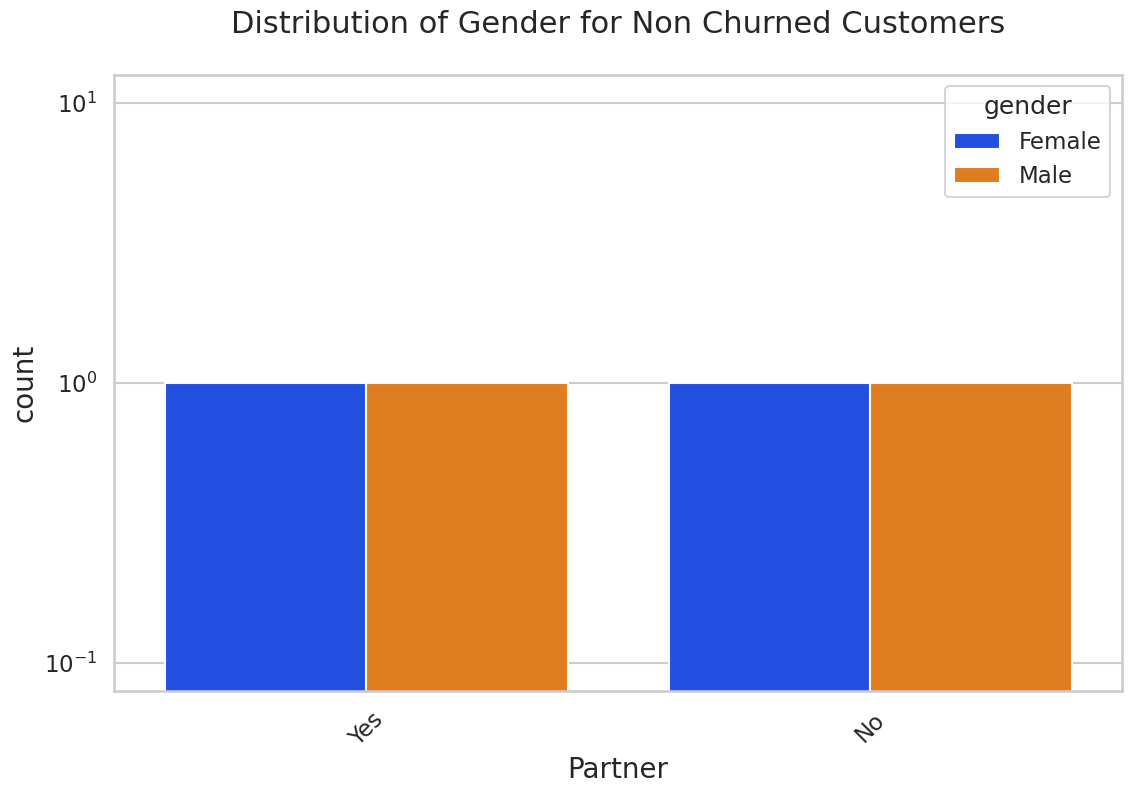

In [36]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


**Distribution of PaymentMethod for Churned Customers**

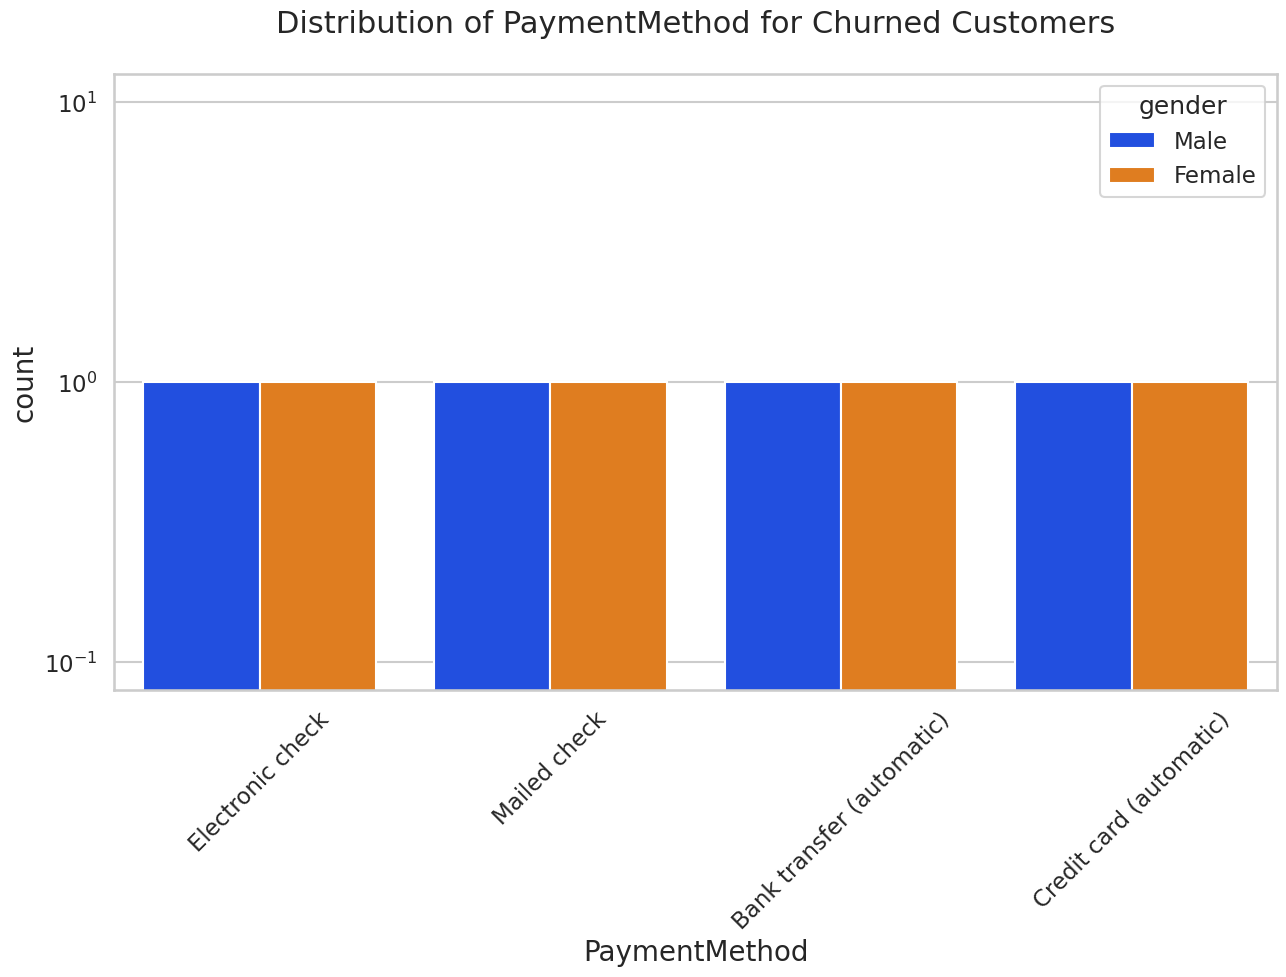

In [38]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


**Distribution of Contract for Churned Customers**

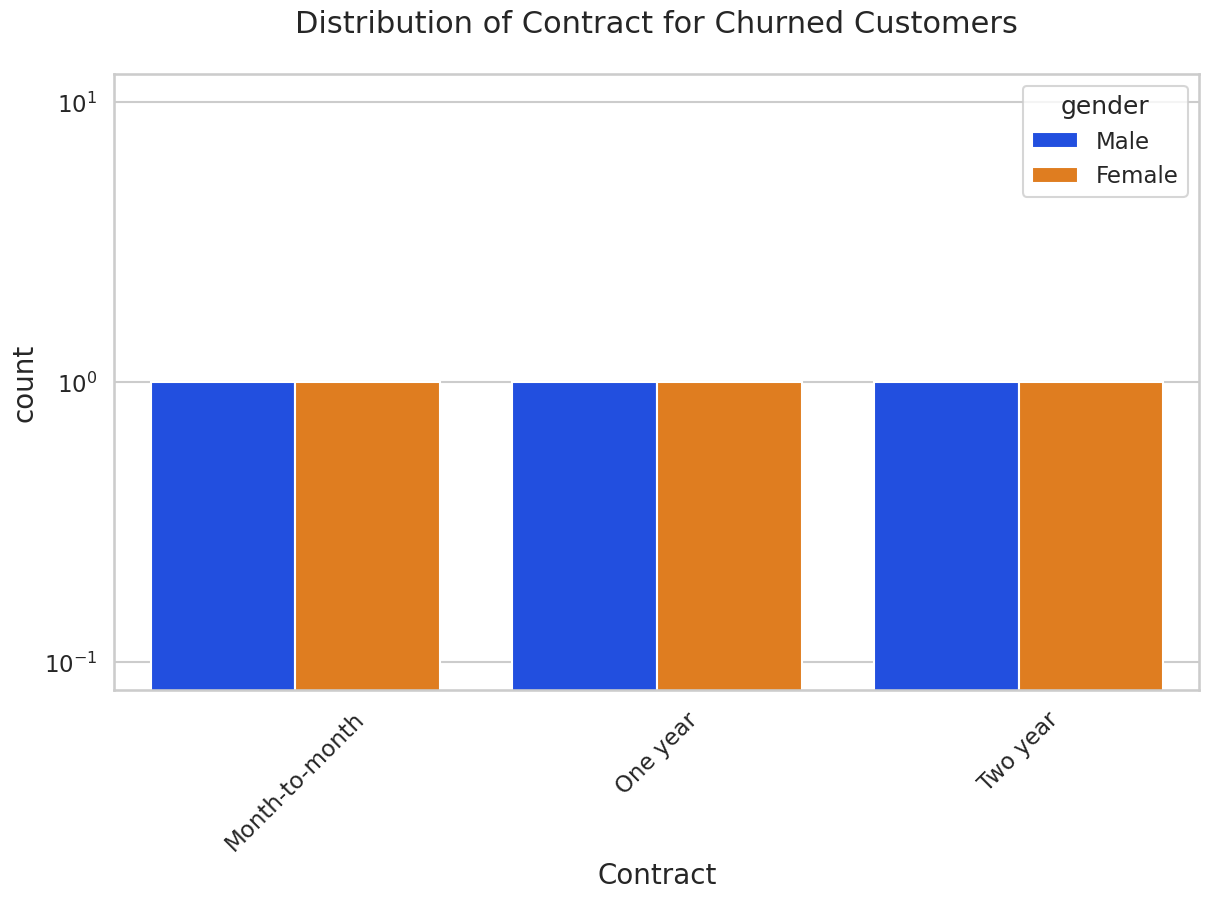

In [37]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


**Distribution of TechSupport for Churned Customers**

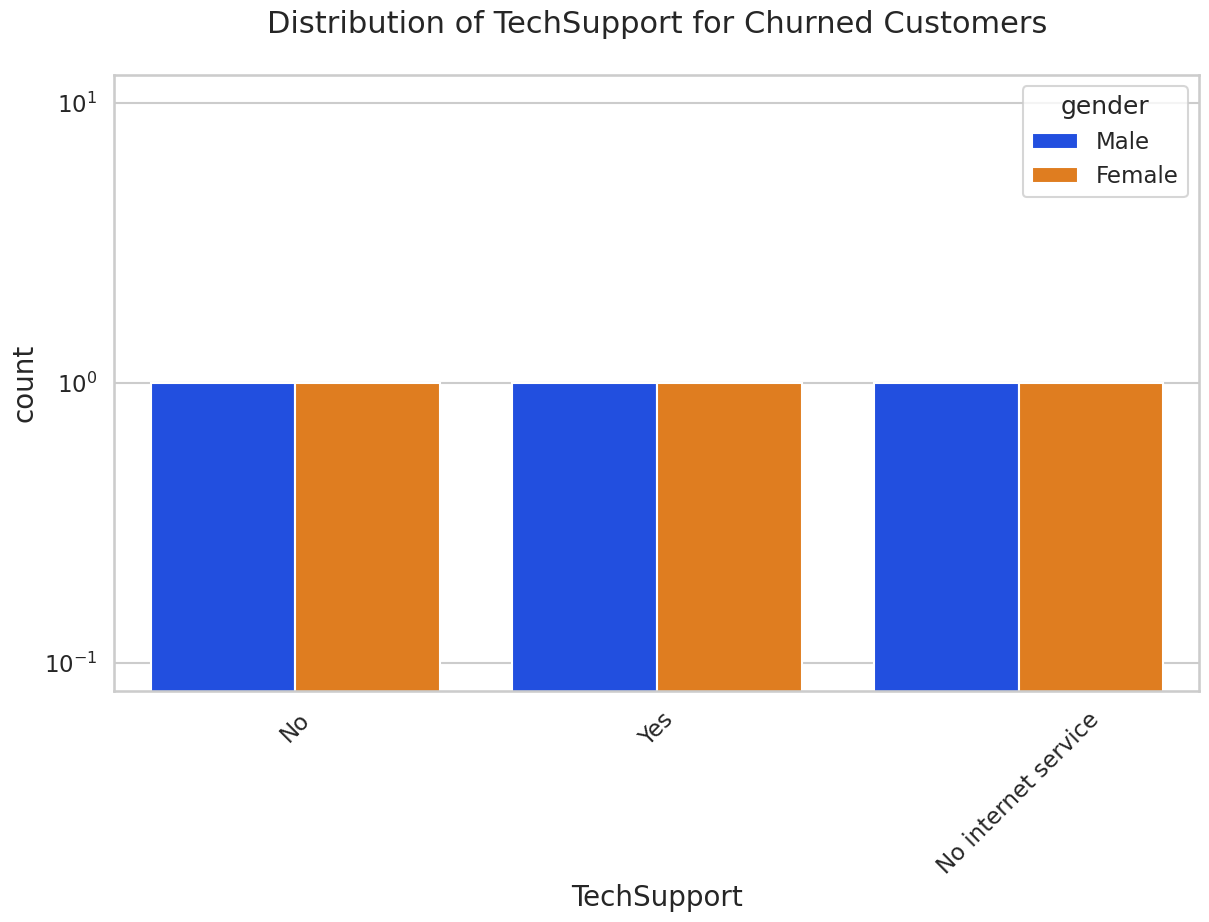

In [41]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


**Distribution of SeniorCitizen for Churned Customers**

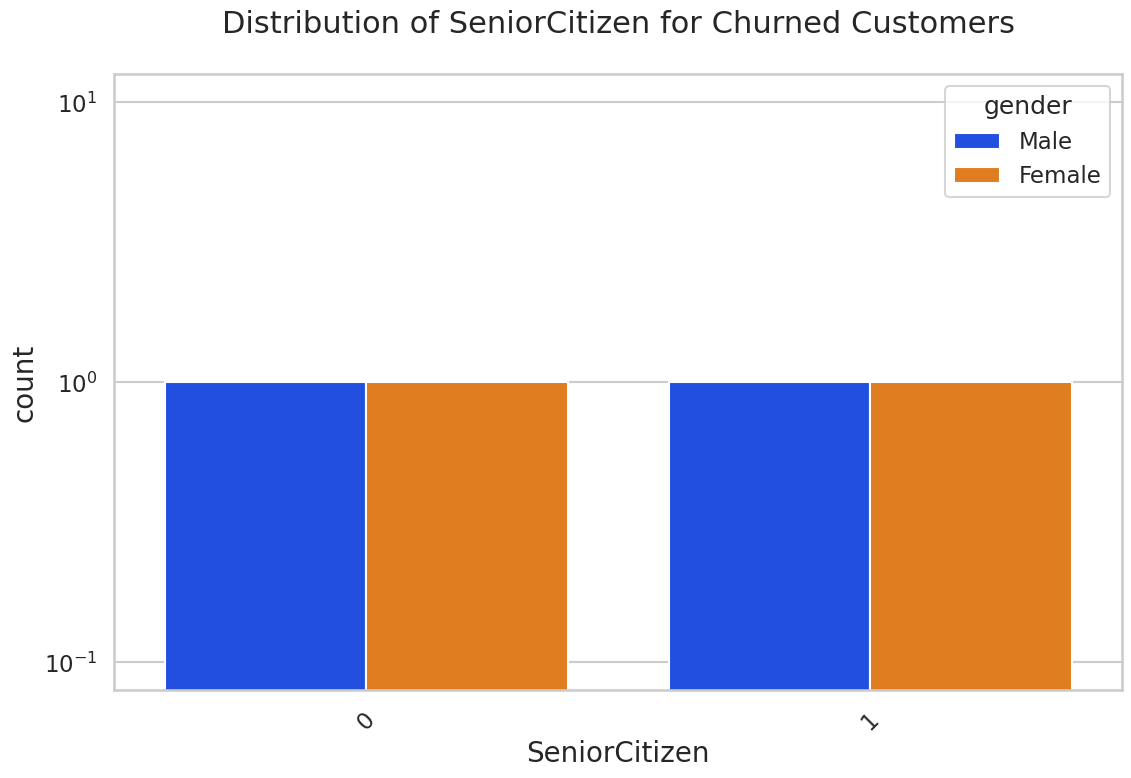

In [39]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


**Save File as tel_churn.csv**

In [40]:
telco_data_dummies.to_csv('tel_churn.csv')
